In [1]:
#importing required libraries

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 5500)
pd.set_option('display.max_rows', 5500)

import matplotlib.pyplot as pt
import seaborn as sn

import random

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score,mean_squared_error as mse
from math import sqrt

In [2]:
#Reading train data
account = pd.read_csv('train.csv')
account.head(10)

,serial number,account_info,duration_month,Loan,Regularity,Purpose,credit_amount,savings_account,Saving Account,employment_st,Salary,investment,Gender,Status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
0,1,BRONZE,6,YES,NO,A40,1169,A65,NaN,A75,852,34.08,M,Umarried,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,2,SILVER,48,YES,YES,A40,5951,A61,72.0,A73,2400,48.00,F,Divorced,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,3,NaN,12,YES,NO,A46,2096,A61,68.0,A74,2078,41.56,M,Umarried,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,4,BRONZE,42,YES,YES,A40,7882,A61,73.0,A74,2380,47.60,M,Umarried,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,5,BRONZE,24,YES,NO,A40,4870,A61,52.0,A73,1756,52.68,M,Umarried,A101,4,A124,53,A143,A153,2,A173,2,A191,A201
5,6,NaN,36,YES,YES,A46,9055,A65,NaN,A73,2363,47.26,M,Umarried,A101,4,A124,35,A143,A153,1,A172,2,A192,A201
6,7,NaN,24,YES,YES,A40,2835,A63,990.0,A75,1567,47.01,M,Umarried,A101,4,A122,53,A143,A152,1,A173,1,A191,A201
7,8,SILVER,36,YES,YES,A40,6948,A61,98.0,A73,2305,46.10,M,Umarried,A101,2,A123,35,A143,A151,1,A174,1,A192,A201
8,9,NaN,12,YES,YES,A40,3059,A64,2641.0,A74,1891,37.82,M,Divorced,A101,4,A121,61,A143,A152,1,A172,1,A191,A201
9,10,SILVER,30,YES,NO,A40,5234,A61,14.0,A71,964,38.56,M,Married,A101,2,A123,28,A143,A152,2,A174,1,A191,A201


In [3]:
#shape
account.shape

(700, 25)

In [4]:
#general info
account.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   serial number     700 non-null    int64  
 1   account_info      427 non-null    object 
 2   duration_month    700 non-null    int64  
 3   Loan              700 non-null    object 
 4   Regularity        700 non-null    object 
 5   Purpose           700 non-null    object 
 6   credit_amount     700 non-null    int64  
 7   savings_account   700 non-null    object 
 8   Saving Account    580 non-null    float64
 9   employment_st     700 non-null    object 
 10  Salary            700 non-null    int64  
 11  investment        700 non-null    float64
 12  Gender            700 non-null    object 
 13  Status            700 non-null    object 
 14  gurantors         700 non-null    object 
 15  resident_since    700 non-null    int64  
 16  property_type     700 non-null    object 
 1

In [5]:
#reading test data

test_ac = pd.read_csv('test.csv')
test_ac.head()

,serial number,account_info,duration_month,Loan,Regularity,Purpose,savings_account,Saving Account,employment_st,Salary,investment,Gender,Status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
0,1,NaN,12,YES,YES,A40,A63,517.0,A73,1134,45.36,F,Divorced,A101,4,A123,29,A143,A151,1,A172,1,A191,A201
1,2,BRONZE,48,YES,NO,A40,A61,18.0,A75,783,31.32,M,Umarried,A101,4,A124,46,A143,A153,2,A173,1,A192,A201
2,3,GOLD,24,YES,YES,A40,A62,389.0,A75,1181,47.24,F,Divorced,A101,2,A124,47,A143,A153,1,A173,1,A192,A201
3,4,SILVER,30,YES,NO,A49,A62,326.0,A75,853,34.12,M,Umarried,A101,2,A122,41,A142,A152,2,A173,1,A191,A201
4,5,SILVER,27,YES,YES,A49,A61,16.0,A72,888,35.52,F,Divorced,A101,1,A122,32,A143,A152,1,A173,2,A192,A201


In [6]:
#shape
test_ac.shape

(300, 24)

In [7]:
#general info
test_ac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   serial number     300 non-null    int64  
 1   account_info      179 non-null    object 
 2   duration_month    300 non-null    int64  
 3   Loan              300 non-null    object 
 4   Regularity        300 non-null    object 
 5   Purpose           300 non-null    object 
 6   savings_account   300 non-null    object 
 7   Saving Account    237 non-null    float64
 8   employment_st     300 non-null    object 
 9   Salary            300 non-null    int64  
 10  investment        300 non-null    float64
 11  Gender            300 non-null    object 
 12  Status            300 non-null    object 
 13  gurantors         300 non-null    object 
 14  resident_since    300 non-null    int64  
 15  property_type     300 non-null    object 
 16  age               300 non-null    int64  
 1

In [8]:
test_ac.columns

Index(['serial number', 'account_info', 'duration_month', 'Loan', 'Regularity',
       'Purpose', 'savings_account', 'Saving Account', 'employment_st',
       'Salary', 'investment', 'Gender', 'Status', 'gurantors',
       'resident_since', 'property_type', 'age', 'installment_type',
       'housing_type', 'credits_no', 'job_type', 'liables', 'telephone',
       'foreigner'],
      dtype='object')

In [9]:
account.columns

Index(['serial number', 'account_info', 'duration_month', 'Loan', 'Regularity',
       'Purpose', 'credit_amount', 'savings_account', 'Saving Account',
       'employment_st', 'Salary', 'investment', 'Gender', 'Status',
       'gurantors', 'resident_since', 'property_type', 'age',
       'installment_type', 'housing_type', 'credits_no', 'job_type', 'liables',
       'telephone', 'foreigner'],
      dtype='object')

In [10]:
#defining categorical and numerical variables

account

cat=['account_info','Loan', 'Regularity','Purpose','savings_account','employment_st','Gender', 'Status','gurantors',
    'property_type','installment_type', 'housing_type','job_type','telephone', 'foreigner']
num = [i for i in account.columns if i not in cat]


In [11]:
#ordered and unorderd categorical variabbles

or_cat=['savings_account','employment_st','gurantors']
un_cat = [i for i in cat if i not in or_cat]
un_cat

['account_info',
 'Loan',
 'Regularity',
 'Purpose',
 'Gender',
 'Status',
 'property_type',
 'installment_type',
 'housing_type',
 'job_type',
 'telephone',
 'foreigner']

## Missing value treatment

In [12]:
# Missing value treatment
print(round(100*(account.isnull().sum()/len(account)),2))

serial number        0.00
account_info        39.00
duration_month       0.00
Loan                 0.00
Regularity           0.00
Purpose              0.00
credit_amount        0.00
savings_account      0.00
Saving Account      17.14
employment_st        0.00
Salary               0.00
investment           0.00
Gender               0.00
Status               0.00
gurantors            0.00
resident_since       0.00
property_type        0.00
age                  0.00
installment_type     0.00
housing_type         0.00
credits_no           0.00
job_type             0.00
liables              0.00
telephone            0.00
foreigner            0.00
dtype: float64


## account_info and Saving Account have missing values

### as per data dictionary 

#### savings_account: This variable signifies details of the amount present in savings account of the individual:
 ####   1.A61 signifies that less than 100 units (excluding 100) of currency is present
 ####   2.A62 signifies that greater than 100 units (including 100) and less than 500 (excluding 500) units of currency is present
 ####   3.A63 signifies that greater than 500 (including 500) and less than 1000 (excluding 1000) units of currency is present.
 ####   4.A64 signifies that greater than 1000 (including 1000) units of currency is present.
  ####  5.A65 signifies that no savings account details is present on record

In [13]:
#checking value counts
for i in ['savings_account', 'Saving Account']:
    print(account[i].value_counts(dropna=False))

A61    427
A65    120
A62     77
A63     42
A64     34
Name: savings_account, dtype: int64
NaN       120
81.0        9
90.0        9
34.0        8
87.0        8
98.0        8
20.0        7
31.0        7
39.0        7
85.0        7
29.0        7
56.0        6
61.0        6
70.0        6
45.0        6
50.0        6
2.0         6
93.0        6
11.0        6
5.0         6
55.0        6
8.0         6
47.0        6
14.0        6
73.0        6
54.0        5
80.0        5
86.0        5
46.0        5
17.0        5
3.0         5
44.0        5
71.0        5
97.0        5
41.0        5
72.0        5
64.0        5
89.0        5
43.0        5
66.0        5
62.0        5
76.0        5
32.0        5
13.0        5
95.0        5
33.0        4
36.0        4
82.0        4
67.0        4
30.0        4
68.0        4
10.0        4
23.0        4
77.0        4
7.0         4
63.0        4
16.0        4
19.0        4
96.0        4
79.0        4
75.0        4
35.0        4
22.0        4
38.0        4
83.0        4

In [14]:
#finding out null value rows
account.loc[account['Saving Account'].isnull(),['account_info','savings_account', 'Saving Account']]

,account_info,savings_account,Saving Account
0,BRONZE,A65,NaN
5,NaN,A65,NaN
16,NaN,A65,NaN
17,BRONZE,A65,NaN
24,NaN,A65,NaN
33,NaN,A65,NaN
50,SILVER,A65,NaN
53,NaN,A65,NaN
55,NaN,A65,NaN
56,SILVER,A65,NaN


In [15]:
account.loc[account['account_info'].isnull() & account['Saving Account'].isnull(),['account_info','Saving Account']]

,account_info,Saving Account
5,NaN,NaN
16,NaN,NaN
24,NaN,NaN
33,NaN,NaN
53,NaN,NaN
55,NaN,NaN
65,NaN,NaN
69,NaN,NaN
71,NaN,NaN
78,NaN,NaN


In [16]:
#replacing null values with npr - no savings present (A65)

account.loc[account['account_info'].isnull() & account['Saving Account'].isnull(),['account_info']]=account.loc[account['account_info'].isnull() & account['Saving Account'].isnull(),['account_info']].replace(np.NaN,'npr')

In [17]:
account.loc[account['Saving Account'].isnull(),['account_info','savings_account', 'Saving Account']]

,account_info,savings_account,Saving Account
0,BRONZE,A65,NaN
5,npr,A65,NaN
16,npr,A65,NaN
17,BRONZE,A65,NaN
24,npr,A65,NaN
33,npr,A65,NaN
50,SILVER,A65,NaN
53,npr,A65,NaN
55,npr,A65,NaN
56,SILVER,A65,NaN


In [18]:
# it is observed that all nan values in 'Saving Account' defines that no information is available for those customers
# It is decided to impute all null values as 0 for this columns

account.loc[account['Saving Account'].isnull(),['Saving Account']]=0.0
# account.loc[account['account_info'].isnull() & account['Saving Account'].isnull(),['account_info']]=account.loc[account['account_info'].isnull() & account['Saving Account'].isnull(),['account_info']].replace(np.NaN,'npr')

In [19]:
#replacing null values with npr - no savings present (A65)
test_ac.loc[test_ac['account_info'].isnull() & test_ac['Saving Account'].isnull(),['account_info']]=test_ac.loc[test_ac['account_info'].isnull() & test_ac['Saving Account'].isnull(),['account_info']].replace(np.NaN,'npr')

In [20]:
#test ac 

test_ac.loc[test_ac['Saving Account'].isnull(),['Saving Account']]=0.0

In [21]:
round(100*(account['Saving Account'].isnull().sum()/account.shape[0]),2)

0.0

In [22]:
round(100*(account.isnull().sum()/account.shape[0]),2)

serial number        0.00
account_info        30.29
duration_month       0.00
Loan                 0.00
Regularity           0.00
Purpose              0.00
credit_amount        0.00
savings_account      0.00
Saving Account       0.00
employment_st        0.00
Salary               0.00
investment           0.00
Gender               0.00
Status               0.00
gurantors            0.00
resident_since       0.00
property_type        0.00
age                  0.00
installment_type     0.00
housing_type         0.00
credits_no           0.00
job_type             0.00
liables              0.00
telephone            0.00
foreigner            0.00
dtype: float64

In [23]:
account['account_info'].value_counts(dropna=False)

NaN       212
SILVER    197
BRONZE    183
npr        61
GOLD       47
Name: account_info, dtype: int64

In [24]:
# account = account.dropna(axis=0,subset=['account_info'])
# round(100*(account.isnull().sum()/account.shape[0]),2)

In [25]:
account.shape

(700, 25)

In [26]:
# #test_ac

# test_ac = test_ac.dropna(axis=0,subset=['account_info'])
# round(100*(test_ac.isnull().sum()/test_ac.shape[0]),2)

In [27]:
test_ac.shape

(300, 24)

In [28]:
# # as null value is higher , imouting these with random values of the same column

# random.seed(100)
# account.loc[account['account_info'].isnull(),['account_info']] = random.choice(list(account.loc[~account['account_info'].isnull(),['account_info']]))
# round(100*(account.isnull().sum()/account.shape[0]),2)

In [29]:
# # test_ac
# random.seed(10)
# test_ac.loc[test_ac['account_info'].isnull(),['account_info']] = random.choice(list(test_ac.loc[~test_ac['account_info'].isnull(),['account_info']]))
# round(100*(test_ac.isnull().sum()/test_ac.shape[0]),2)

In [30]:
# random.seed(100)
# account.loc[account['account_info'].isnull(),['account_info']]= random.choice(['SILVER','BRONZE','GOLD'])
# round(100*(account.isnull().sum()/account.shape[0]),2)

In [31]:
# # # test_ac
# random.seed(10)
# test_ac.loc[test_ac['account_info'].isnull(),['account_info']] = random.choice(['SILVER','BRONZE','GOLD'])
# round(100*(test_ac.isnull().sum()/test_ac.shape[0]),2)

In [32]:
un_cat.remove('account_info')
un_cat

['Loan',
 'Regularity',
 'Purpose',
 'Gender',
 'Status',
 'property_type',
 'installment_type',
 'housing_type',
 'job_type',
 'telephone',
 'foreigner']

In [33]:
#creating dummies

# unordered categories

dummy= pd.get_dummies(account[un_cat],drop_first=True)
account.drop(un_cat,axis=1,inplace=True)
account = pd.concat([account,dummy],axis=1)
account

,serial number,account_info,duration_month,credit_amount,savings_account,Saving Account,employment_st,Salary,investment,gurantors,resident_since,age,credits_no,liables,Loan_YES,Regularity_YES,Purpose_A410,Purpose_A46,Purpose_A48,Purpose_A49,Gender_M,Status_Married,Status_Umarried,property_type_A122,property_type_A123,property_type_A124,installment_type_A142,installment_type_A143,housing_type_A152,housing_type_A153,job_type_A172,job_type_A173,job_type_A174,telephone_A192,foreigner_A202
0,1,BRONZE,6,1169,A65,0.0,A75,852,34.08,A101,4,67,2,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,1,0
1,2,SILVER,48,5951,A61,72.0,A73,2400,48.00,A101,2,22,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0
2,3,NaN,12,2096,A61,68.0,A74,2078,41.56,A101,3,49,1,2,1,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0
3,4,BRONZE,42,7882,A61,73.0,A74,2380,47.60,A103,4,45,1,2,1,1,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0,0
4,5,BRONZE,24,4870,A61,52.0,A73,1756,52.68,A101,4,53,2,2,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,0
5,6,npr,36,9055,A65,0.0,A73,2363,47.26,A101,4,35,1,2,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,1,0,0,1,0
6,7,NaN,24,2835,A63,990.0,A75,1567,47.01,A101,4,53,1,1,1,1,0,0,0,0,1,0,1,1,0,0,0,1,1,0,0,1,0,0,0
7,8,SILVER,36,6948,A61,98.0,A73,2305,46.10,A101,2,35,1,1,1,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0
8,9,NaN,12,3059,A64,2641.0,A74,1891,37.82,A101,4,61,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0
9,10,SILVER,30,5234,A61,14.0,A71,964,38.56,A101,2,28,2,1,1,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,0,1,0,0


In [34]:
# test_ac

#creating dummies

# unordered categories

dummyt= pd.get_dummies(test_ac[un_cat],drop_first=True)
test_ac.drop(un_cat,axis=1,inplace=True)
test_ac = pd.concat([test_ac,dummyt],axis=1)
test_ac.head()

,serial number,account_info,duration_month,savings_account,Saving Account,employment_st,Salary,investment,gurantors,resident_since,age,credits_no,liables,Loan_YES,Regularity_YES,Purpose_A410,Purpose_A46,Purpose_A48,Purpose_A49,Gender_M,Status_Married,Status_Umarried,property_type_A122,property_type_A123,property_type_A124,installment_type_A142,installment_type_A143,housing_type_A152,housing_type_A153,job_type_A172,job_type_A173,job_type_A174,telephone_A192,foreigner_A202
0,1,NaN,12,A63,517.0,A73,1134,45.36,A101,4,29,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0
1,2,BRONZE,48,A61,18.0,A75,783,31.32,A101,4,46,2,1,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0
2,3,GOLD,24,A62,389.0,A75,1181,47.24,A101,2,47,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0
3,4,SILVER,30,A62,326.0,A75,853,34.12,A101,2,41,2,1,1,0,0,0,0,1,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0
4,5,SILVER,27,A61,16.0,A72,888,35.52,A101,1,32,1,2,1,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0


In [35]:
# ordered categorical variables
or_cat

['savings_account', 'employment_st', 'gurantors']

In [36]:
#importing label encoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

dummy2 = account[or_cat].apply(le.fit_transform)
dummy2.head()

,savings_account,employment_st,gurantors
0,4,4,0
1,0,2,0
2,0,3,0
3,0,3,2
4,0,2,0


In [37]:
# test_ac

dm2 = test_ac[or_cat].apply(le.fit_transform)
dm2.head()

,savings_account,employment_st,gurantors
0,2,2,0
1,0,4,0
2,1,4,0
3,1,4,0
4,0,1,0


In [38]:
for i in dummy2.columns:
    print(dummy2[i].value_counts(dropna=False))
    print(account[i].value_counts(dropna=False))

0    427
4    120
1     77
2     42
3     34
Name: savings_account, dtype: int64
A61    427
A65    120
A62     77
A63     42
A64     34
Name: savings_account, dtype: int64
2    244
4    168
3    126
1    118
0     44
Name: employment_st, dtype: int64
A73    244
A75    168
A74    126
A72    118
A71     44
Name: employment_st, dtype: int64
0    633
2     37
1     30
Name: gurantors, dtype: int64
A101    633
A103     37
A102     30
Name: gurantors, dtype: int64


In [39]:
# for saving_account : 
#     1) A65 < A61 < A62 < A 63 < A64 is correct but wrongly imputed 

dummy2.drop(['savings_account'],axis=1,inplace=True)
dummy2.head()

,employment_st,gurantors
0,4,0
1,2,0
2,3,0
3,3,2
4,2,0


In [40]:
#dm2 for test_ac

dm2.drop(['savings_account'],axis=1,inplace=True)

In [41]:
account=pd.concat([account,dummy2],axis=1)
account.drop([i for i in dummy2.columns],axis=1,inplace=True)
account.head()

,serial number,account_info,duration_month,credit_amount,savings_account,Saving Account,Salary,investment,resident_since,age,credits_no,liables,Loan_YES,Regularity_YES,Purpose_A410,Purpose_A46,Purpose_A48,Purpose_A49,Gender_M,Status_Married,Status_Umarried,property_type_A122,property_type_A123,property_type_A124,installment_type_A142,installment_type_A143,housing_type_A152,housing_type_A153,job_type_A172,job_type_A173,job_type_A174,telephone_A192,foreigner_A202
0,1,BRONZE,6,1169,A65,0.0,852,34.08,4,67,2,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,1,0
1,2,SILVER,48,5951,A61,72.0,2400,48.00,2,22,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0
2,3,NaN,12,2096,A61,68.0,2078,41.56,3,49,1,2,1,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0
3,4,BRONZE,42,7882,A61,73.0,2380,47.60,4,45,1,2,1,1,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0,0
4,5,BRONZE,24,4870,A61,52.0,1756,52.68,4,53,2,2,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,0


In [42]:
# test_ac
test_ac=pd.concat([test_ac,dm2],axis=1)
test_ac.drop([i for i in dm2.columns],axis=1,inplace=True)
test_ac.head()

,serial number,account_info,duration_month,savings_account,Saving Account,Salary,investment,resident_since,age,credits_no,liables,Loan_YES,Regularity_YES,Purpose_A410,Purpose_A46,Purpose_A48,Purpose_A49,Gender_M,Status_Married,Status_Umarried,property_type_A122,property_type_A123,property_type_A124,installment_type_A142,installment_type_A143,housing_type_A152,housing_type_A153,job_type_A172,job_type_A173,job_type_A174,telephone_A192,foreigner_A202
0,1,NaN,12,A63,517.0,1134,45.36,4,29,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0
1,2,BRONZE,48,A61,18.0,783,31.32,4,46,2,1,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0
2,3,GOLD,24,A62,389.0,1181,47.24,2,47,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0
3,4,SILVER,30,A62,326.0,853,34.12,2,41,2,1,1,0,0,0,0,1,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0
4,5,SILVER,27,A61,16.0,888,35.52,1,32,1,2,1,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0


In [43]:
account['savings_account'] = account['savings_account'].replace({'A65':0,"A61":1,'A62':2,'A63':3,'A64':4})
account['savings_account'].value_counts(dropna=False)

1    427
0    120
2     77
3     42
4     34
Name: savings_account, dtype: int64

In [44]:
test_ac.columns

Index(['serial number', 'account_info', 'duration_month', 'savings_account',
       'Saving Account', 'Salary', 'investment', 'resident_since', 'age',
       'credits_no', 'liables', 'Loan_YES', 'Regularity_YES', 'Purpose_A410',
       'Purpose_A46', 'Purpose_A48', 'Purpose_A49', 'Gender_M',
       'Status_Married', 'Status_Umarried', 'property_type_A122',
       'property_type_A123', 'property_type_A124', 'installment_type_A142',
       'installment_type_A143', 'housing_type_A152', 'housing_type_A153',
       'job_type_A172', 'job_type_A173', 'job_type_A174', 'telephone_A192',
       'foreigner_A202'],
      dtype='object')

In [45]:
# test_ac

test_ac['savings_account'] = test_ac['savings_account'].replace({'A65':0,"A61":1,'A62':2,'A63':3,'A64':4})
test_ac['savings_account'].value_counts(dropna=False)


1    176
0     63
2     26
3     21
4     14
Name: savings_account, dtype: int64

In [46]:
account.drop('account_info',axis=1, inplace=True)
account.head()

,serial number,duration_month,credit_amount,savings_account,Saving Account,Salary,investment,resident_since,age,credits_no,liables,Loan_YES,Regularity_YES,Purpose_A410,Purpose_A46,Purpose_A48,Purpose_A49,Gender_M,Status_Married,Status_Umarried,property_type_A122,property_type_A123,property_type_A124,installment_type_A142,installment_type_A143,housing_type_A152,housing_type_A153,job_type_A172,job_type_A173,job_type_A174,telephone_A192,foreigner_A202
0,1,6,1169,0,0.0,852,34.08,4,67,2,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,1,0
1,2,48,5951,1,72.0,2400,48.00,2,22,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0
2,3,12,2096,1,68.0,2078,41.56,3,49,1,2,1,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0
3,4,42,7882,1,73.0,2380,47.60,4,45,1,2,1,1,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0,0
4,5,24,4870,1,52.0,1756,52.68,4,53,2,2,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,0


In [47]:
#test_ac

test_ac.drop('account_info',axis=1, inplace=True)
test_ac.head()

,serial number,duration_month,savings_account,Saving Account,Salary,investment,resident_since,age,credits_no,liables,Loan_YES,Regularity_YES,Purpose_A410,Purpose_A46,Purpose_A48,Purpose_A49,Gender_M,Status_Married,Status_Umarried,property_type_A122,property_type_A123,property_type_A124,installment_type_A142,installment_type_A143,housing_type_A152,housing_type_A153,job_type_A172,job_type_A173,job_type_A174,telephone_A192,foreigner_A202
0,1,12,3,517.0,1134,45.36,4,29,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0
1,2,48,1,18.0,783,31.32,4,46,2,1,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0
2,3,24,2,389.0,1181,47.24,2,47,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0
3,4,30,2,326.0,853,34.12,2,41,2,1,1,0,0,0,0,1,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0
4,5,27,1,16.0,888,35.52,1,32,1,2,1,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0


In [48]:
account.describe(percentiles=[0,0.25,0.5,0.70,0.75,0.80,0.90,0.95,0.955,0.96,0.97,0.98,0.985,0.99,0.995])

,serial number,duration_month,credit_amount,savings_account,Saving Account,Salary,investment,resident_since,age,credits_no,liables,Loan_YES,Regularity_YES,Purpose_A410,Purpose_A46,Purpose_A48,Purpose_A49,Gender_M,Status_Married,Status_Umarried,property_type_A122,property_type_A123,property_type_A124,installment_type_A142,installment_type_A143,housing_type_A152,housing_type_A153,job_type_A172,job_type_A173,job_type_A174,telephone_A192,foreigner_A202
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,20.652857,3182.331429,1.204286,219.744286,1610.258571,39.365286,2.808571,35.322857,1.392857,1.148571,0.917143,0.620000,0.014286,0.057143,0.01000,0.097143,0.691429,0.091429,0.551429,0.220000,0.340000,0.155714,0.045714,0.814286,0.718571,0.111429,0.195714,0.635714,0.150000,0.397143,0.037143
std,202.21688,12.279683,2725.319217,0.958202,527.785992,784.923838,6.784642,1.114573,11.319842,0.572328,0.355920,0.275863,0.485734,0.118751,0.232281,0.09957,0.296364,0.462234,0.288424,0.497704,0.414543,0.474047,0.362844,0.209014,0.389154,0.450018,0.314887,0.397033,0.481573,0.357327,0.489656,0.189247
min,1.00000,4.000000,276.000000,0.000000,0.000000,700.000000,26.010000,1.000000,19.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0%,1.00000,4.000000,276.000000,0.000000,0.000000,700.000000,26.010000,1.000000,19.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,175.75000,12.000000,1350.750000,1.000000,13.000000,953.500000,33.742500,2.000000,27.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,350.50000,18.000000,2253.000000,1.000000,55.000000,1265.500000,39.570000,3.000000,33.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
70%,490.30000,24.000000,3502.900000,1.000000,87.000000,2064.000000,43.960000,4.000000,39.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,525.25000,24.000000,3913.250000,1.000000,95.000000,2198.250000,44.765000,4.000000,41.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
80%,560.20000,30.000000,4629.800000,2.000000,158.200000,2365.000000,45.884000,4.000000,44.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000


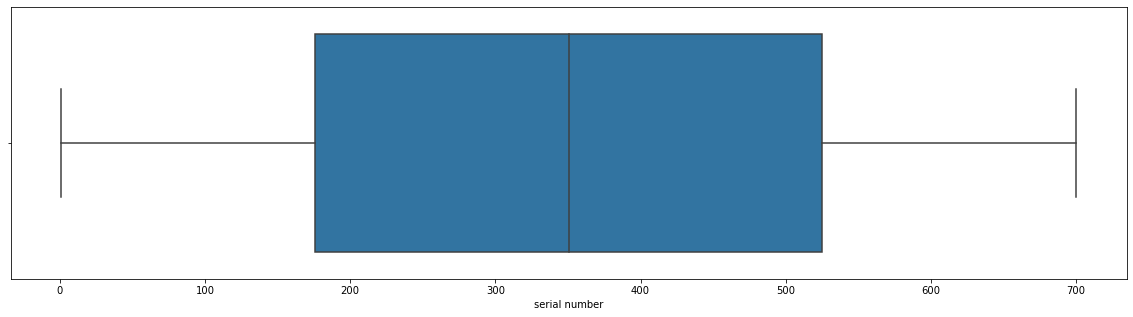

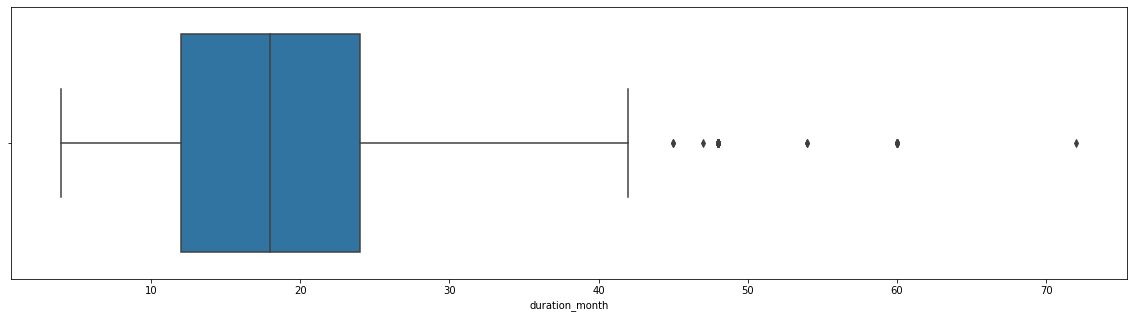

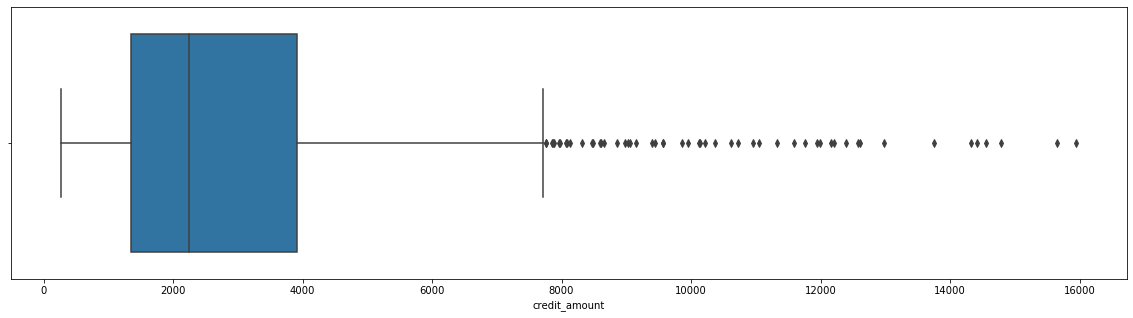

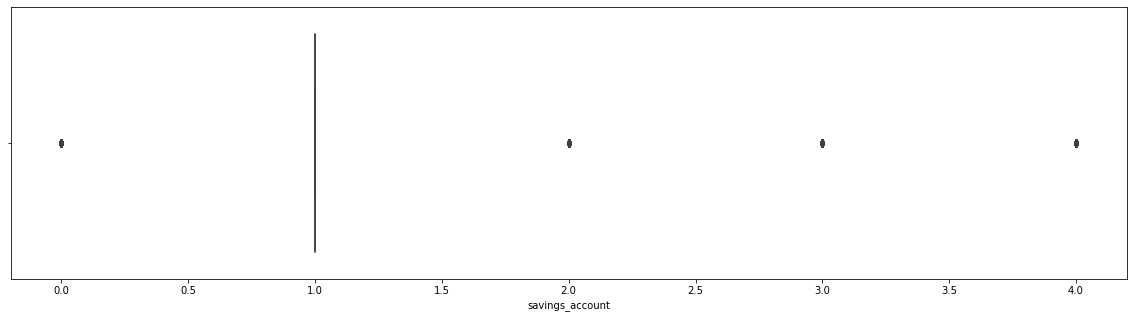

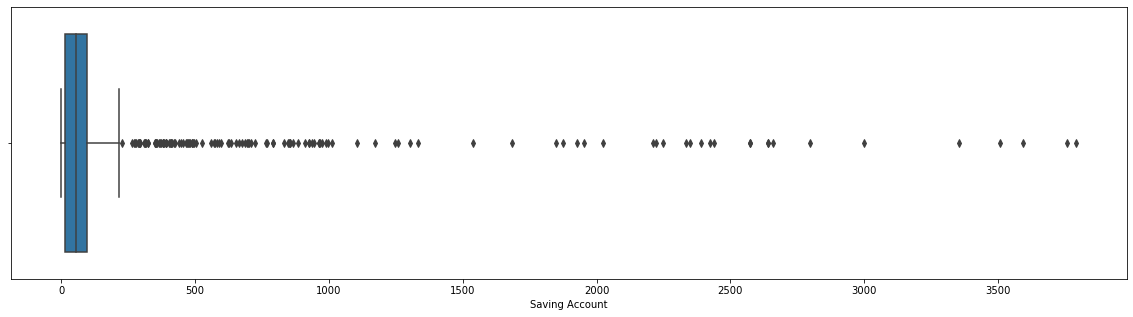

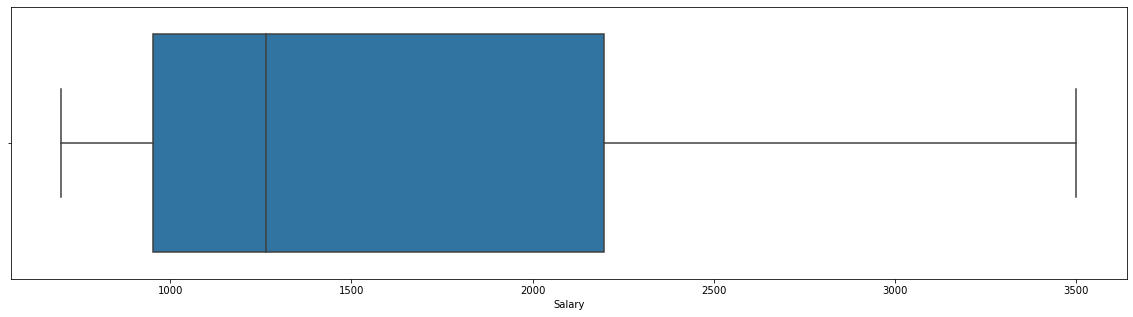

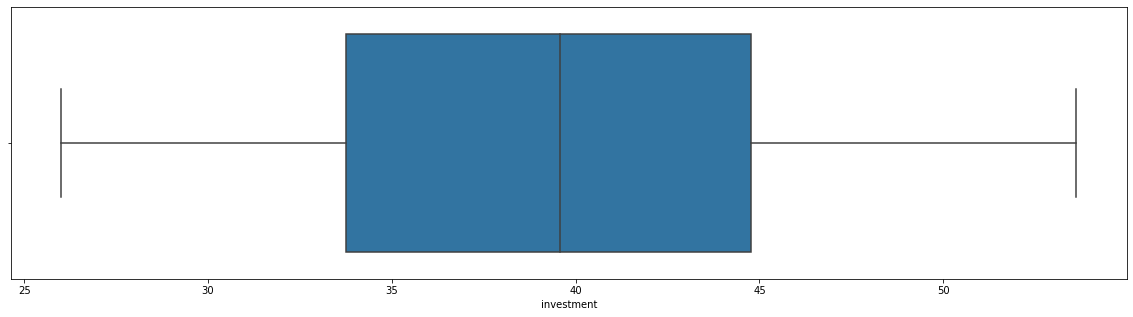

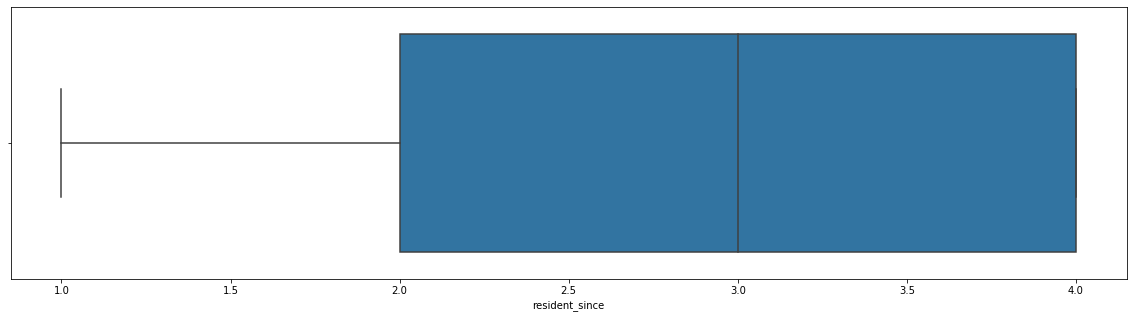

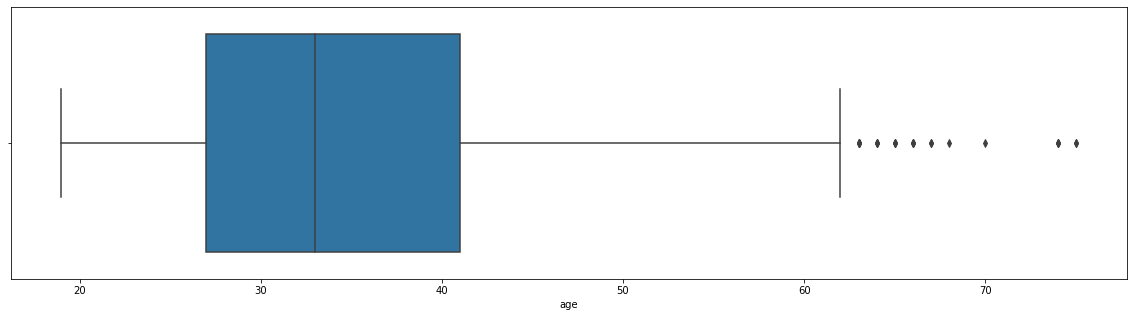

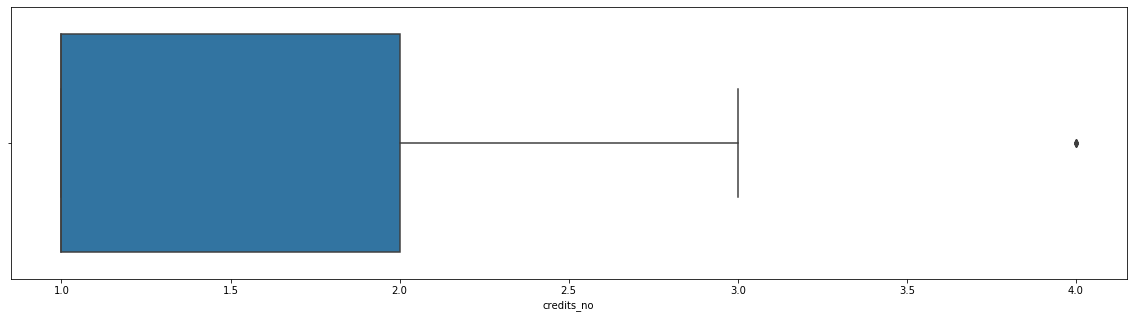

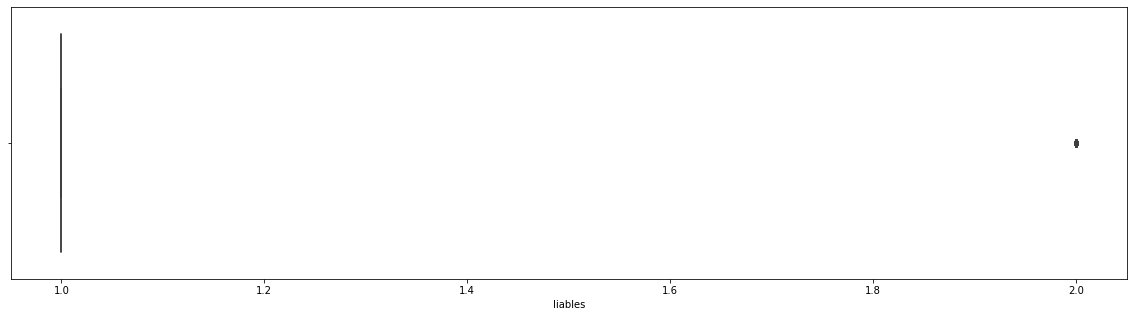

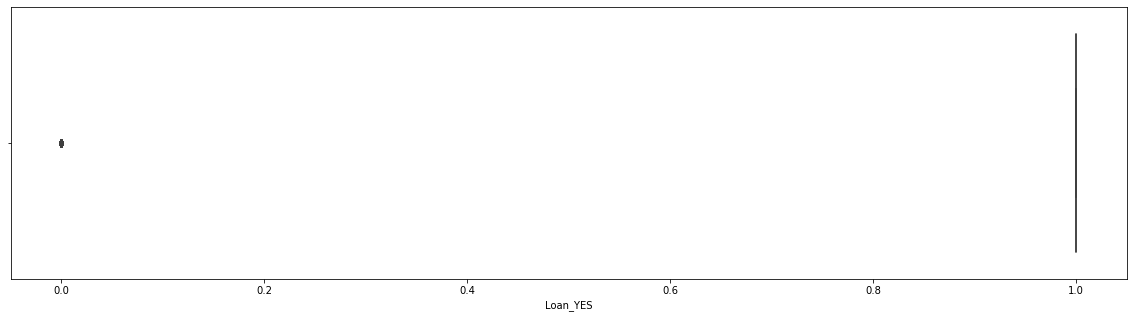

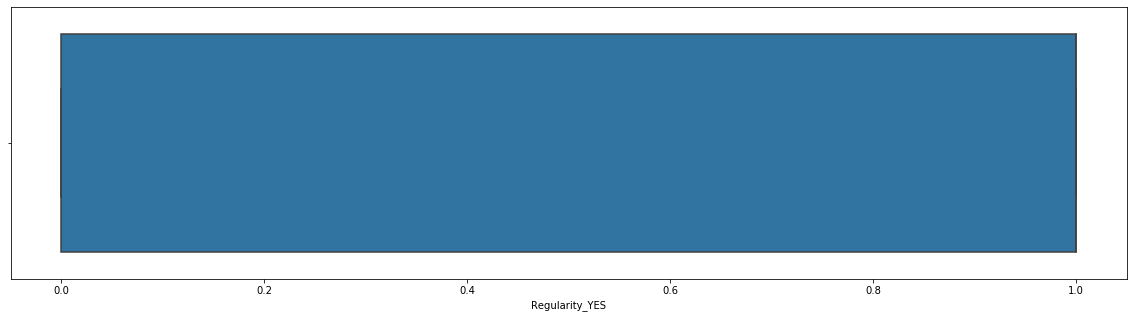

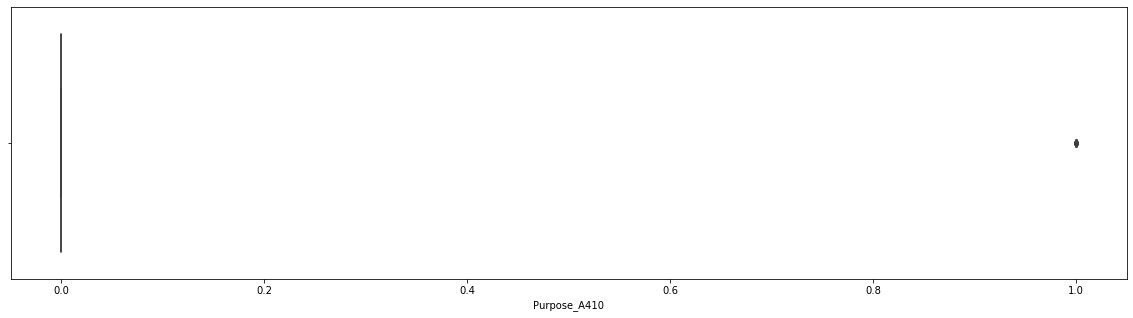

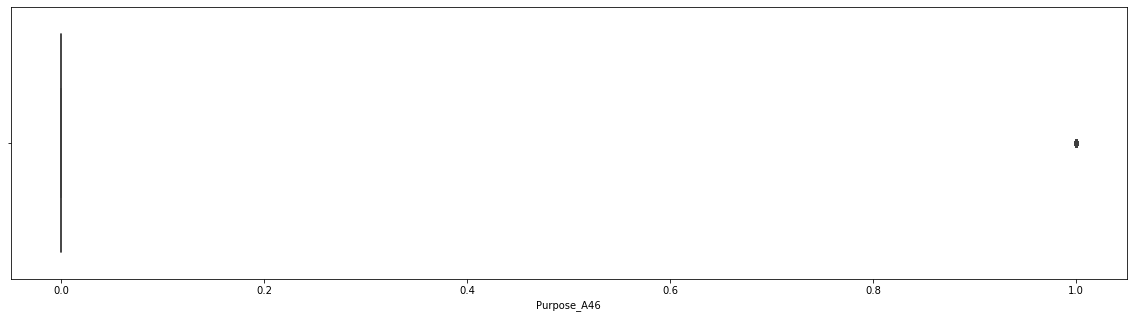

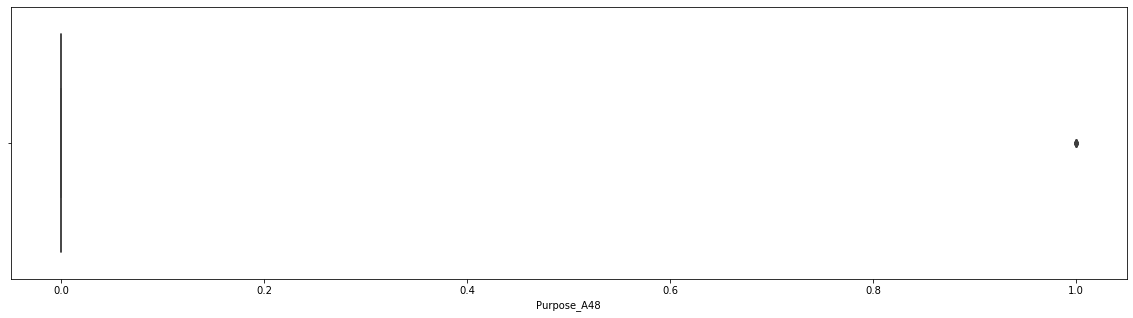

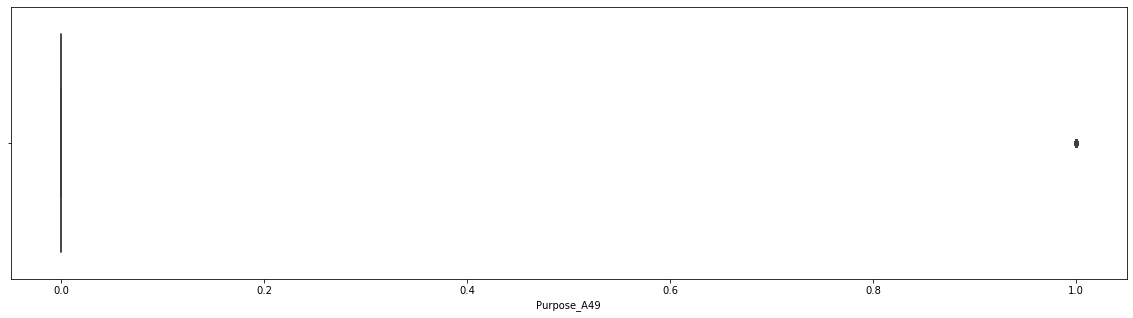

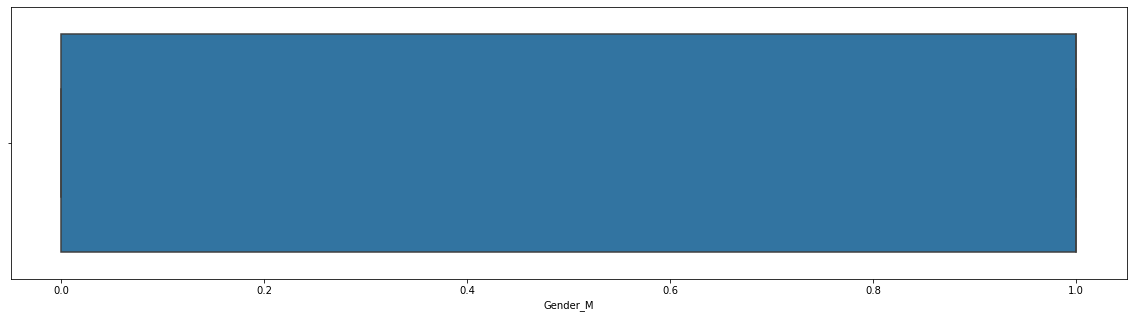

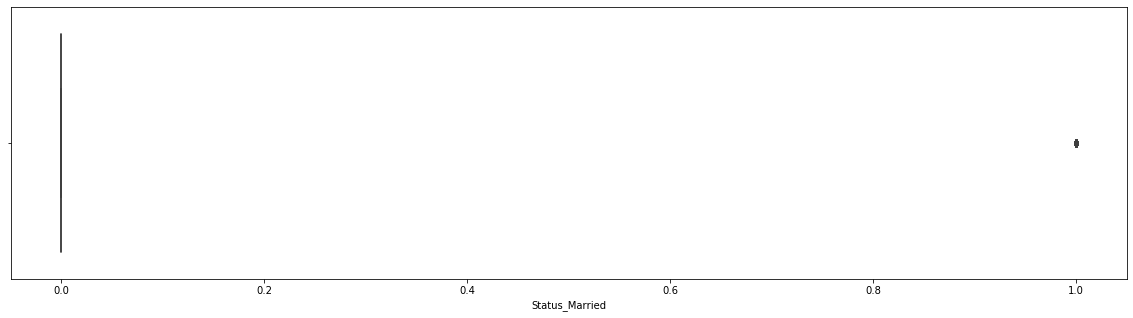

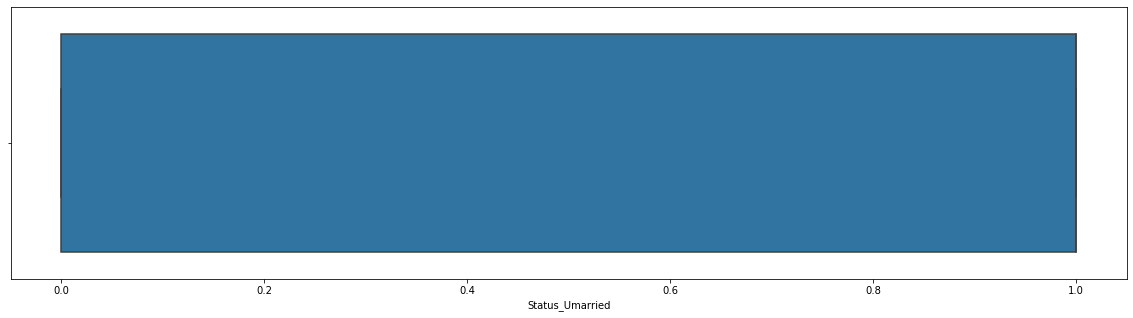

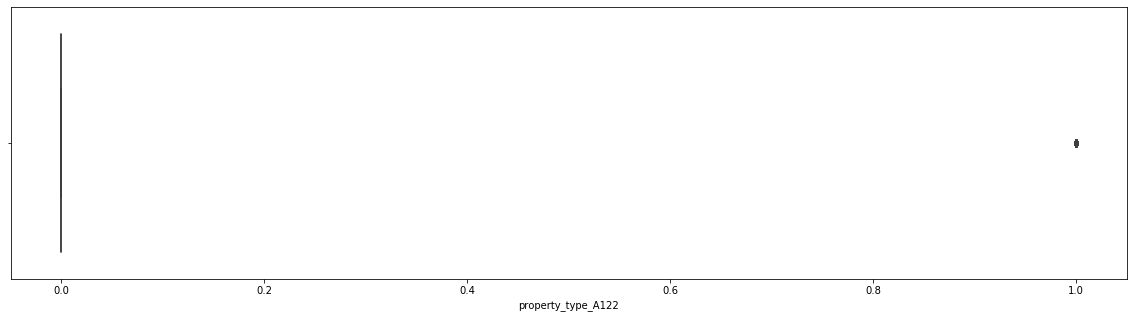

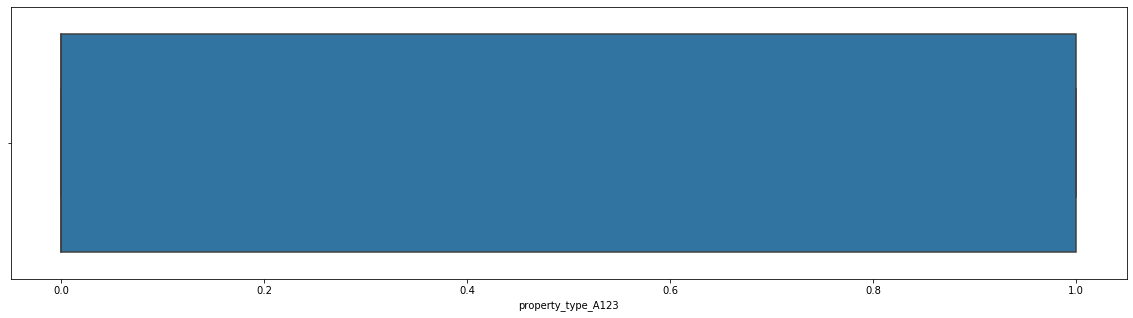

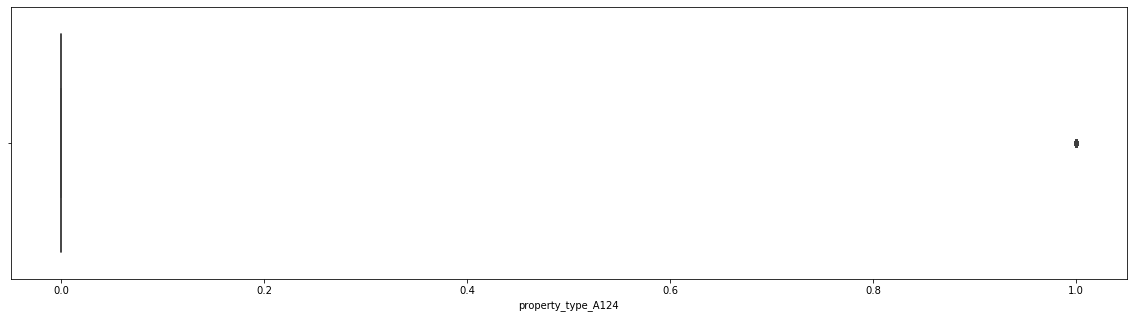

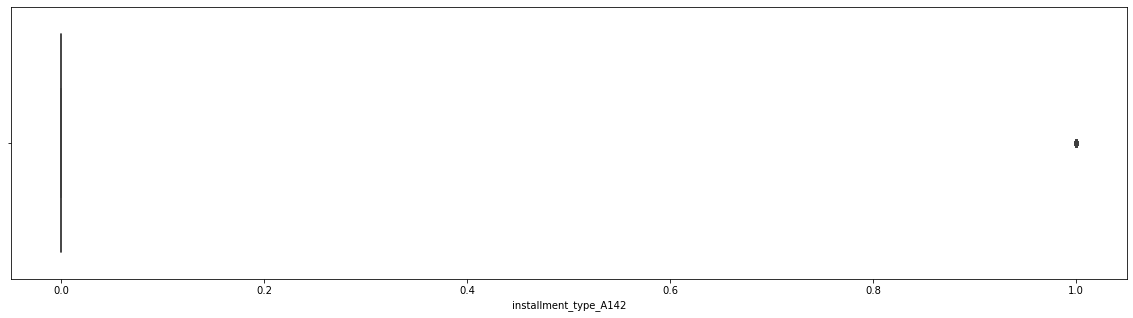

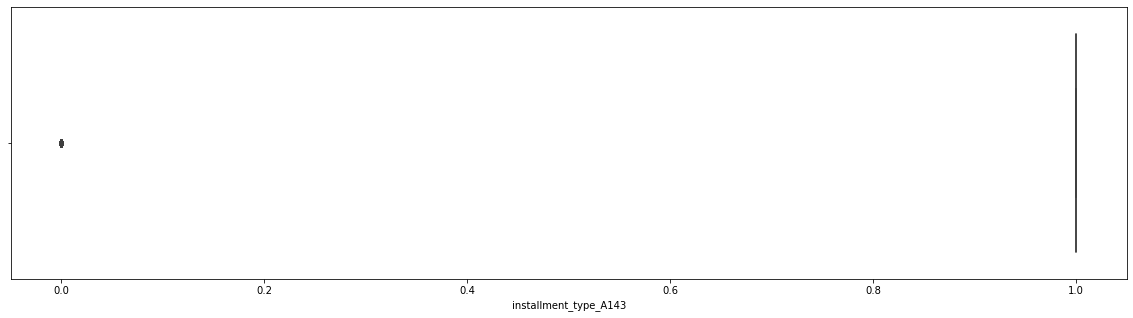

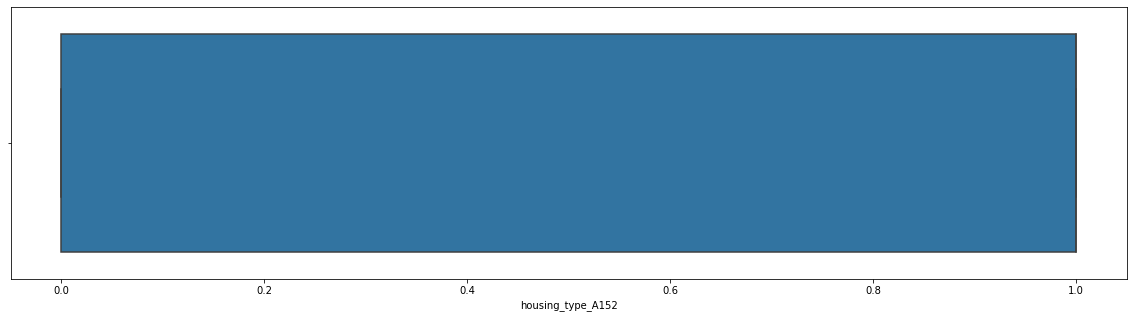

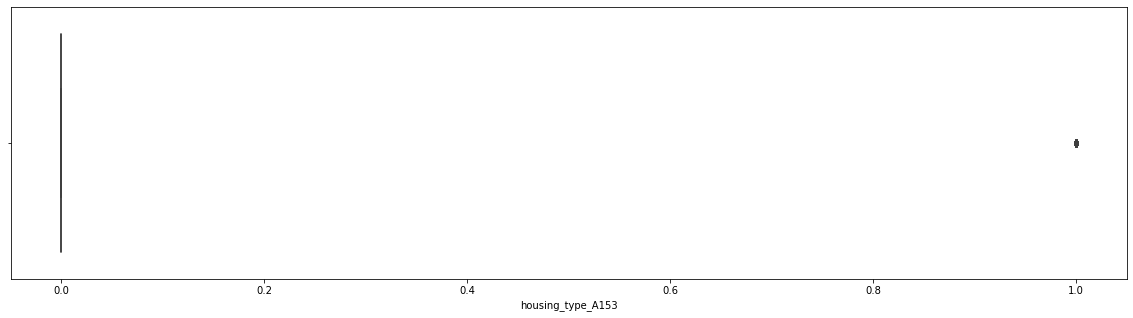

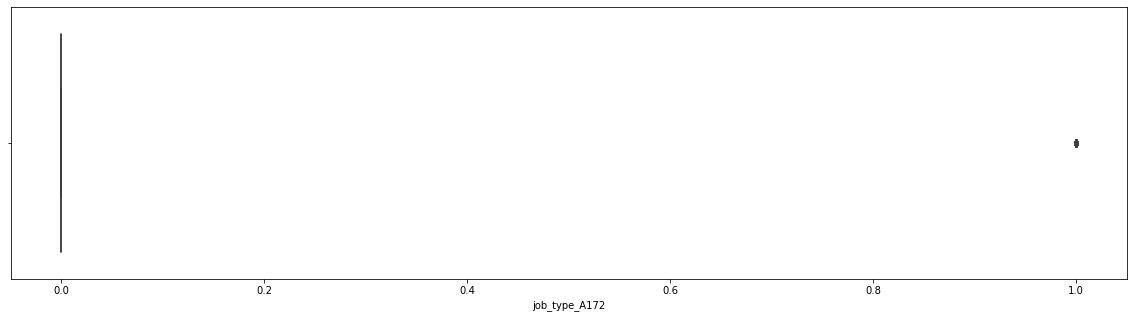

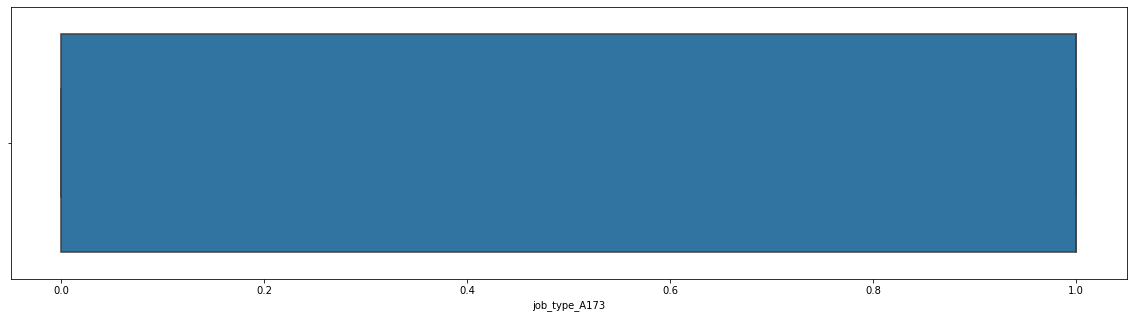

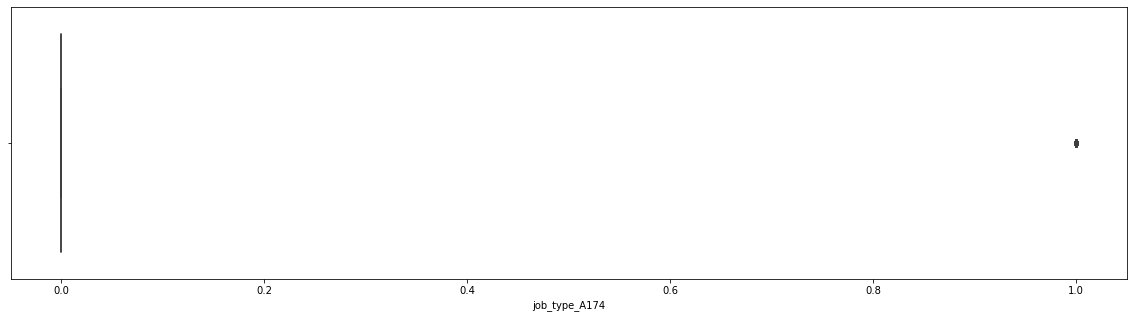

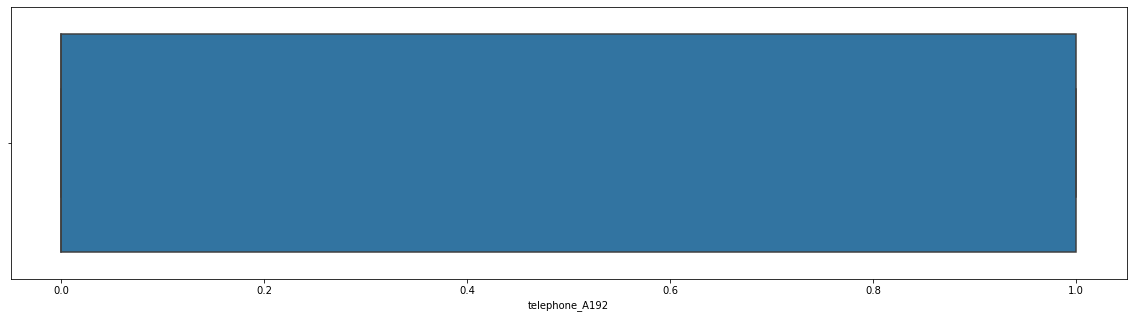

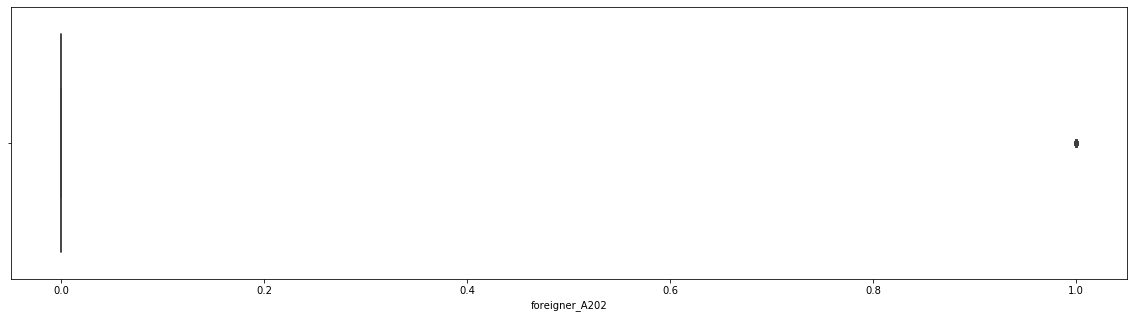

In [49]:
for i in account.columns:
    plt.figure(figsize=(20,5))
    sns.boxplot(account[i])
    plt.show()

In [50]:
#removing outliers after 95.5% 

account = account.loc[account['Saving Account'] < account['Saving Account'].quantile(0.96)]

account.describe(percentiles=[0,0.25,0.5,0.70,0.75,0.80,0.90,0.95,0.97,0.98,0.985,0.99,0.995])

,serial number,duration_month,credit_amount,savings_account,Saving Account,Salary,investment,resident_since,age,credits_no,liables,Loan_YES,Regularity_YES,Purpose_A410,Purpose_A46,Purpose_A48,Purpose_A49,Gender_M,Status_Married,Status_Umarried,property_type_A122,property_type_A123,property_type_A124,installment_type_A142,installment_type_A143,housing_type_A152,housing_type_A153,job_type_A172,job_type_A173,job_type_A174,telephone_A192,foreigner_A202
count,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000
mean,352.782738,20.782738,3210.244048,1.087798,125.202381,1614.906250,39.304449,2.809524,35.233631,1.388393,1.151786,0.915179,0.620536,0.014881,0.058036,0.010417,0.098214,0.694940,0.090774,0.556548,0.221726,0.343750,0.157738,0.046131,0.812500,0.715774,0.114583,0.196429,0.630952,0.154762,0.401786,0.035714
std,203.213961,12.388897,2737.835899,0.785316,221.913856,789.089731,6.787529,1.118613,11.236140,0.572116,0.359080,0.278823,0.485615,0.121167,0.233985,0.101605,0.297826,0.460776,0.287501,0.497162,0.415717,0.475313,0.364767,0.209925,0.390603,0.451381,0.318756,0.397592,0.482906,0.361947,0.490624,0.185715
min,1.000000,4.000000,276.000000,0.000000,0.000000,700.000000,26.010000,1.000000,19.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0%,1.000000,4.000000,276.000000,0.000000,0.000000,700.000000,26.010000,1.000000,19.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,176.750000,12.000000,1357.250000,1.000000,11.000000,951.750000,33.657500,2.000000,27.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,354.500000,18.000000,2278.500000,1.000000,50.500000,1269.000000,39.525000,3.000000,33.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
70%,495.700000,24.000000,3561.800000,1.000000,83.000000,2068.000000,43.932000,4.000000,39.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,529.250000,24.000000,3966.750000,1.000000,90.000000,2209.250000,44.640000,4.000000,41.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
80%,562.800000,30.000000,4684.600000,1.000000,97.800000,2369.400000,45.736000,4.000000,44.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000


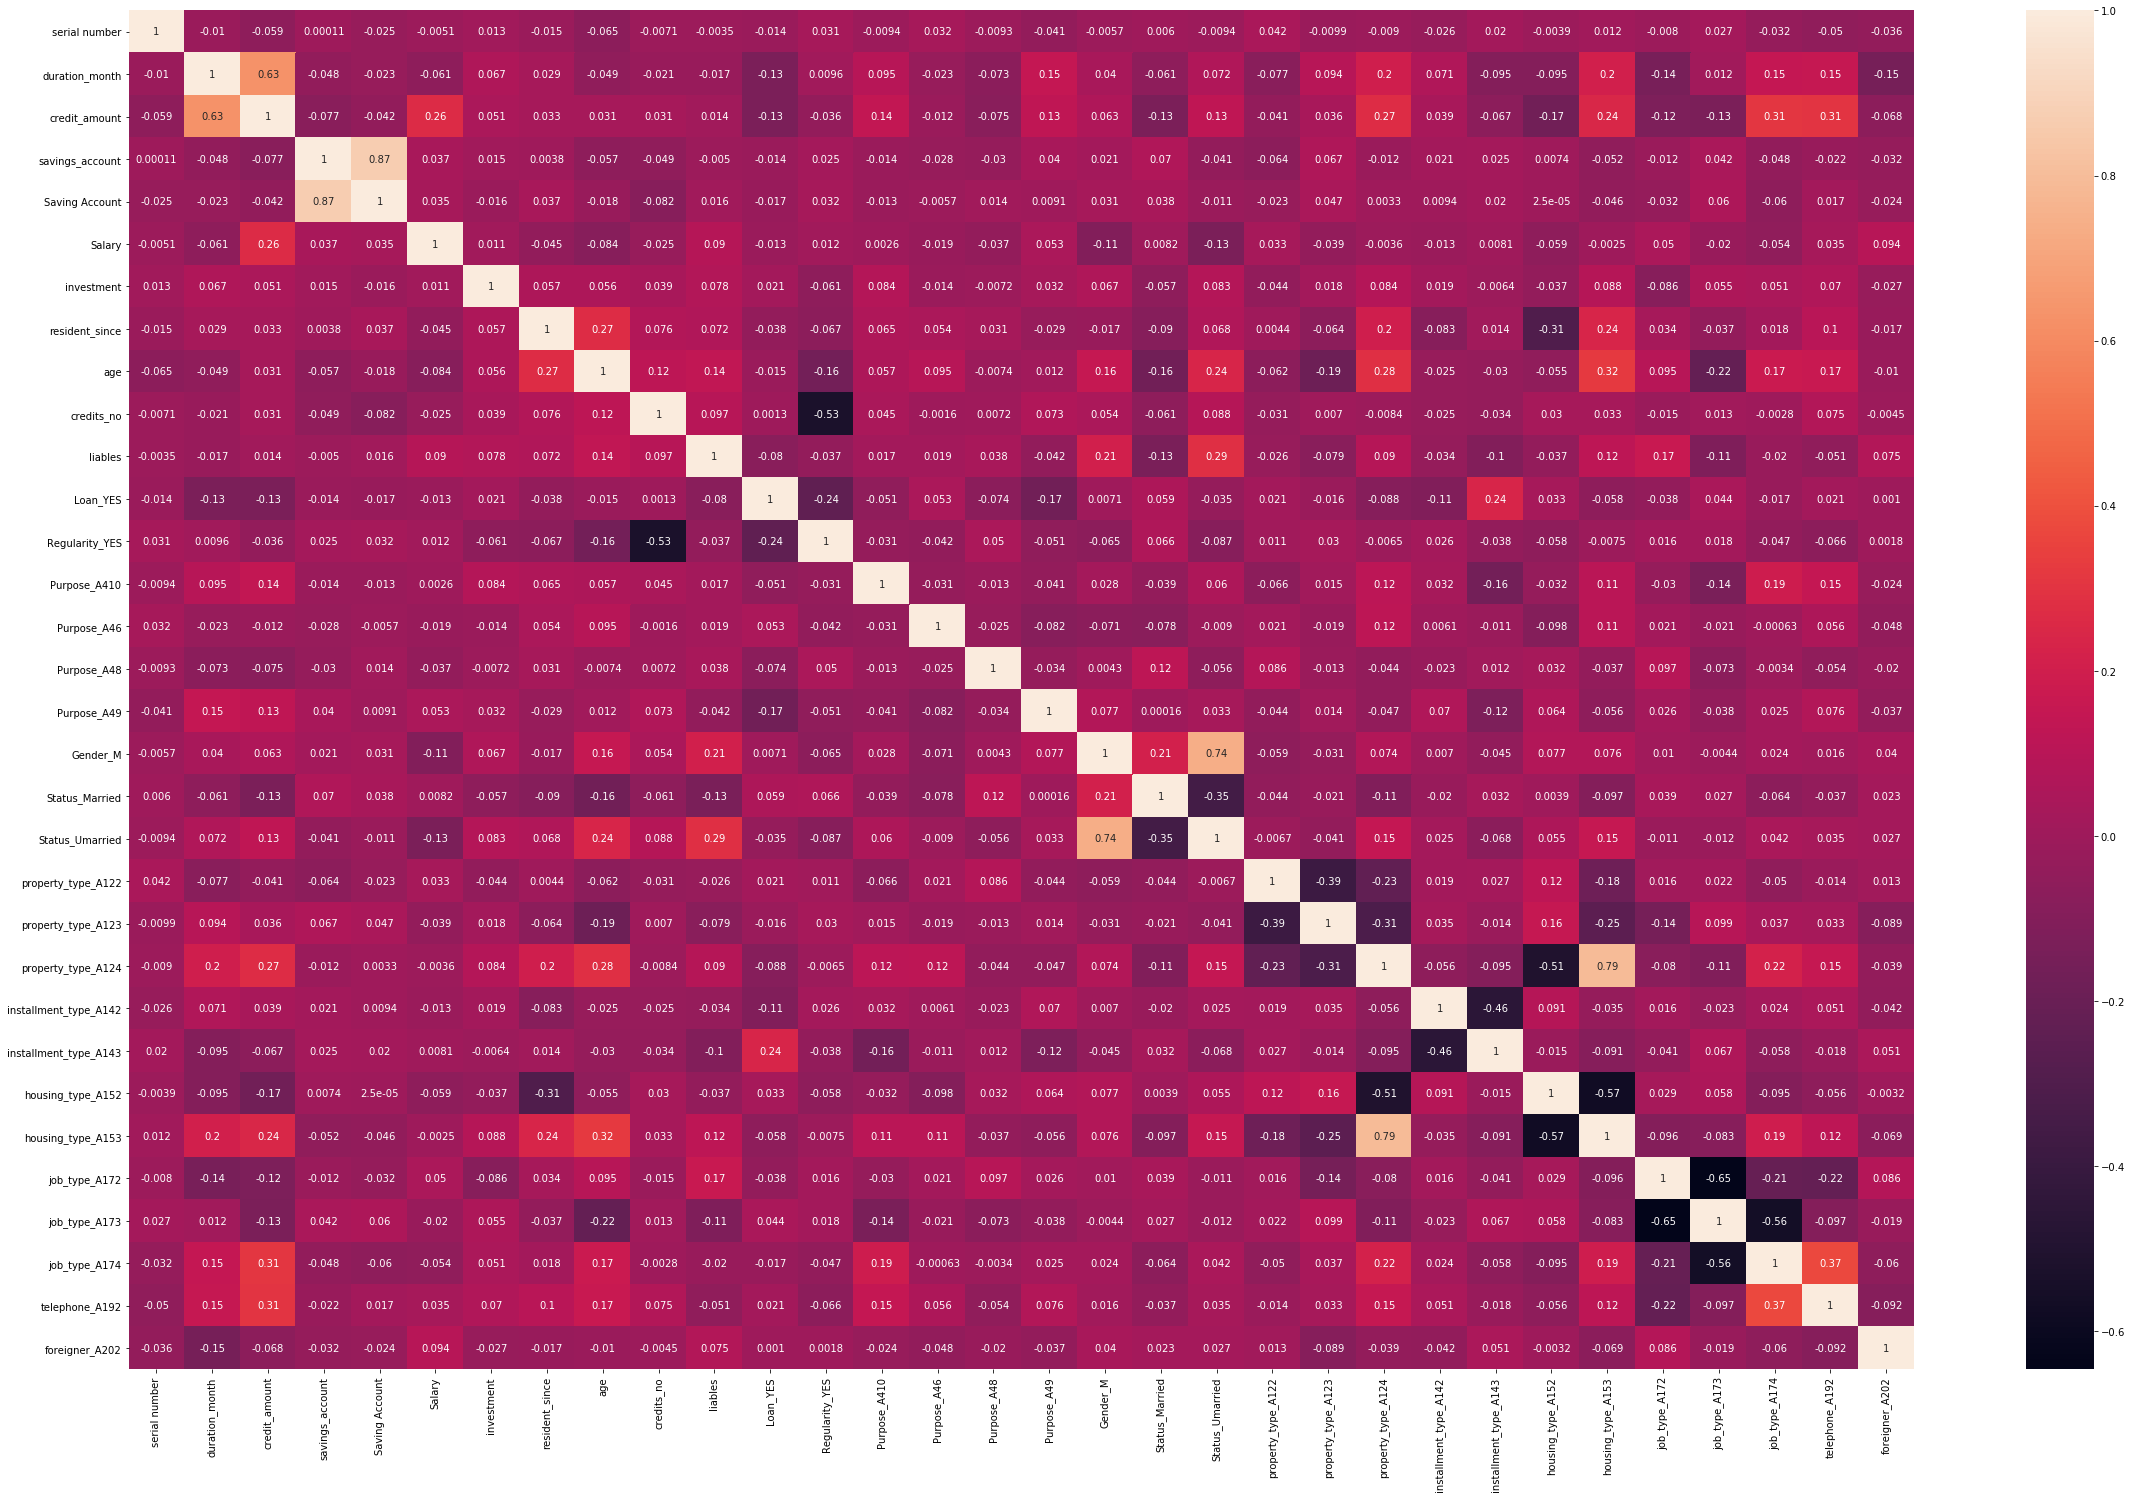

In [51]:
# checking coorelation with the target varibale 'credit_amount'

plt.figure(figsize =(40,25))
sns.heatmap(account.corr(),annot=True)
plt.show()

In [52]:
account.corr()['credit_amount']

serial number           -0.058737
duration_month           0.629606
credit_amount            1.000000
savings_account         -0.076706
Saving Account          -0.042395
Salary                   0.264079
investment               0.050987
resident_since           0.032919
age                      0.031033
credits_no               0.031356
liables                  0.013781
Loan_YES                -0.130082
Regularity_YES          -0.035545
Purpose_A410             0.144337
Purpose_A46             -0.012073
Purpose_A48             -0.074590
Purpose_A49              0.130179
Gender_M                 0.063086
Status_Married          -0.127818
Status_Umarried          0.130745
property_type_A122      -0.041299
property_type_A123       0.035772
property_type_A124       0.273216
installment_type_A142    0.038557
installment_type_A143   -0.067453
housing_type_A152       -0.168146
housing_type_A153        0.241763
job_type_A172           -0.120802
job_type_A173           -0.127193
job_type_A174 

In [53]:
y= account.pop('credit_amount')
X= account
X.head()

,serial number,duration_month,savings_account,Saving Account,Salary,investment,resident_since,age,credits_no,liables,Loan_YES,Regularity_YES,Purpose_A410,Purpose_A46,Purpose_A48,Purpose_A49,Gender_M,Status_Married,Status_Umarried,property_type_A122,property_type_A123,property_type_A124,installment_type_A142,installment_type_A143,housing_type_A152,housing_type_A153,job_type_A172,job_type_A173,job_type_A174,telephone_A192,foreigner_A202
0,1,6,0,0.0,852,34.08,4,67,2,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,1,0
1,2,48,1,72.0,2400,48.00,2,22,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0
2,3,12,1,68.0,2078,41.56,3,49,1,2,1,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0
3,4,42,1,73.0,2380,47.60,4,45,1,2,1,1,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0,0
4,5,24,1,52.0,1756,52.68,4,53,2,2,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,0


In [54]:
# spliting into train and test

from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=100)
X_train.shape

(470, 31)

In [55]:
X_train.head()

,serial number,duration_month,savings_account,Saving Account,Salary,investment,resident_since,age,credits_no,liables,Loan_YES,Regularity_YES,Purpose_A410,Purpose_A46,Purpose_A48,Purpose_A49,Gender_M,Status_Married,Status_Umarried,property_type_A122,property_type_A123,property_type_A124,installment_type_A142,installment_type_A143,housing_type_A152,housing_type_A153,job_type_A172,job_type_A173,job_type_A174,telephone_A192,foreigner_A202
672,673,60,1,99.0,1809,36.18,4,42,1,1,1,1,0,0,0,0,1,0,1,1,0,0,0,1,1,0,0,0,1,1,0
681,682,12,0,0.0,1193,47.72,4,37,1,1,1,1,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0
419,420,18,0,0.0,1112,44.48,2,33,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0
623,624,12,1,50.0,809,32.36,1,22,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
450,451,36,0,0.0,1137,45.48,2,30,1,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,1,0,0,0,1,1,0


In [56]:
y_train.shape

(470,)

In [57]:
serial_train = X_train.pop('serial number')
serial_test = X_test.pop('serial number')
test_serial=test_ac.pop('serial number')

In [58]:
test_ac.columns

Index(['duration_month', 'savings_account', 'Saving Account', 'Salary',
       'investment', 'resident_since', 'age', 'credits_no', 'liables',
       'Loan_YES', 'Regularity_YES', 'Purpose_A410', 'Purpose_A46',
       'Purpose_A48', 'Purpose_A49', 'Gender_M', 'Status_Married',
       'Status_Umarried', 'property_type_A122', 'property_type_A123',
       'property_type_A124', 'installment_type_A142', 'installment_type_A143',
       'housing_type_A152', 'housing_type_A153', 'job_type_A172',
       'job_type_A173', 'job_type_A174', 'telephone_A192', 'foreigner_A202'],
      dtype='object')

In [59]:
colx= X_train.columns

In [60]:
# standardising the feautres

from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

X_train[colx] = scaler.fit_transform(X_train[colx])
X_train.head()

,duration_month,savings_account,Saving Account,Salary,investment,resident_since,age,credits_no,liables,Loan_YES,Regularity_YES,Purpose_A410,Purpose_A46,Purpose_A48,Purpose_A49,Gender_M,Status_Married,Status_Umarried,property_type_A122,property_type_A123,property_type_A124,installment_type_A142,installment_type_A143,housing_type_A152,housing_type_A153,job_type_A172,job_type_A173,job_type_A174,telephone_A192,foreigner_A202
672,3.239006,-0.131842,-0.132530,0.257469,-0.430984,1.037968,0.630940,-0.729399,-0.428811,0.304997,0.79139,-0.13159,-0.261116,-0.113715,-0.333333,0.694730,-0.300811,0.922168,1.923538,-0.725241,-0.432283,-0.226835,0.486664,0.641414,-0.360288,-0.486664,-1.322323,2.351123,1.198012,-0.175219
681,-0.701459,-1.396449,-0.568763,-0.527229,1.245463,1.037968,0.180268,-0.729399,-0.428811,0.304997,0.79139,-0.13159,-0.261116,-0.113715,-0.333333,0.694730,-0.300811,0.922168,-0.519875,-0.725241,2.313299,-0.226835,0.486664,-1.559056,2.775555,-0.486664,0.756245,-0.425329,1.198012,-0.175219
419,-0.208901,-1.396449,-0.568763,-0.630411,0.774779,-0.742488,-0.180268,-0.729399,-0.428811,0.304997,0.79139,-0.13159,-0.261116,-0.113715,-0.333333,-1.439408,-0.300811,-1.084401,1.923538,-0.725241,-0.432283,-0.226835,0.486664,0.641414,-0.360288,-0.486664,0.756245,-0.425329,-0.834716,-0.175219
623,-0.701459,-0.131842,-0.348443,-1.016391,-0.985925,-1.632716,-1.171745,-0.729399,-0.428811,0.304997,0.79139,-0.13159,-0.261116,-0.113715,-0.333333,-1.439408,-0.300811,-1.084401,-0.519875,1.378853,-0.432283,-0.226835,0.486664,-1.559056,-0.360288,-0.486664,0.756245,-0.425329,-0.834716,-0.175219
450,1.268774,-1.396449,-0.568763,-0.598565,0.920052,-0.742488,-0.450671,-0.729399,-0.428811,0.304997,-1.26360,-0.13159,-0.261116,-0.113715,-0.333333,0.694730,-0.300811,0.922168,-0.519875,1.378853,-0.432283,-0.226835,0.486664,0.641414,-0.360288,-0.486664,-1.322323,2.351123,1.198012,-0.175219


In [61]:
X_test[colx]=scaler.transform(X_test[colx])
X_test.head()

,duration_month,savings_account,Saving Account,Salary,investment,resident_since,age,credits_no,liables,Loan_YES,Regularity_YES,Purpose_A410,Purpose_A46,Purpose_A48,Purpose_A49,Gender_M,Status_Married,Status_Umarried,property_type_A122,property_type_A123,property_type_A124,installment_type_A142,installment_type_A143,housing_type_A152,housing_type_A153,job_type_A172,job_type_A173,job_type_A174,telephone_A192,foreigner_A202
282,-0.208901,-1.396449,-0.568763,-0.953972,-0.701191,1.037968,1.261879,-0.729399,-0.428811,-3.278719,0.79139,-0.13159,-0.261116,-0.113715,-0.333333,0.69473,-0.300811,0.922168,-0.519875,1.378853,-0.432283,-0.226835,-2.054805,0.641414,-0.360288,2.054805,-1.322323,-0.425329,-0.834716,-0.175219
109,-0.537273,2.397371,1.749004,2.370802,-0.648893,-0.742488,0.000000,-0.729399,-0.428811,0.304997,0.79139,-0.13159,-0.261116,-0.113715,3.000000,0.69473,3.324347,-1.084401,-0.519875,-0.725241,-0.432283,-0.226835,0.486664,0.641414,-0.360288,-0.486664,0.756245,-0.425329,1.198012,-0.175219
56,-0.701459,-1.396449,-0.568763,0.519884,0.167540,-1.632716,1.532282,-0.729399,-0.428811,0.304997,0.79139,-0.13159,-0.261116,-0.113715,-0.333333,0.69473,-0.300811,0.922168,-0.519875,-0.725241,2.313299,-0.226835,0.486664,0.641414,-0.360288,-0.486664,-1.322323,2.351123,1.198012,-0.175219
201,-0.701459,-0.131842,-0.427758,-0.863528,-0.288617,0.147740,-0.721074,-0.729399,-0.428811,0.304997,0.79139,-0.13159,-0.261116,-0.113715,-0.333333,0.69473,3.324347,-1.084401,-0.519875,-0.725241,-0.432283,-0.226835,0.486664,0.641414,-0.360288,2.054805,-1.322323,-0.425329,-0.834716,-0.175219
314,-1.358203,-1.396449,-0.568763,2.071445,-0.990284,-0.742488,-0.540805,-0.729399,2.332028,0.304997,0.79139,-0.13159,-0.261116,-0.113715,-0.333333,0.69473,-0.300811,0.922168,-0.519875,-0.725241,-0.432283,-0.226835,0.486664,0.641414,-0.360288,2.054805,-1.322323,-0.425329,-0.834716,5.707138


In [62]:
#test_ac

test_ac[colx]=scaler.transform(test_ac[colx])
test_ac.head()

,duration_month,savings_account,Saving Account,Salary,investment,resident_since,age,credits_no,liables,Loan_YES,Regularity_YES,Purpose_A410,Purpose_A46,Purpose_A48,Purpose_A49,Gender_M,Status_Married,Status_Umarried,property_type_A122,property_type_A123,property_type_A124,installment_type_A142,installment_type_A143,housing_type_A152,housing_type_A153,job_type_A172,job_type_A173,job_type_A174,telephone_A192,foreigner_A202
0,-0.701459,2.397371,1.709346,-0.602387,0.902619,1.037968,-0.540805,-0.729399,-0.428811,0.304997,0.79139,-0.13159,-0.261116,-0.113715,-0.333333,-1.439408,-0.300811,-1.084401,-0.519875,1.378853,-0.432283,-0.226835,0.486664,-1.559056,-0.360288,2.054805,-1.322323,-0.425329,-0.834716,-0.175219
1,2.253890,-0.131842,-0.489448,-1.049511,-1.137009,1.037968,0.991477,0.967717,-0.428811,0.304997,-1.26360,-0.13159,-0.261116,-0.113715,-0.333333,0.694730,-0.300811,0.922168,-0.519875,-0.725241,2.313299,-0.226835,0.486664,-1.559056,2.775555,-0.486664,0.756245,-0.425329,1.198012,-0.175219
2,0.283658,1.132765,1.145327,-0.542515,1.175732,-0.742488,1.081611,-0.729399,-0.428811,0.304997,0.79139,-0.13159,-0.261116,-0.113715,-0.333333,-1.439408,-0.300811,-1.084401,-0.519875,-0.725241,2.313299,-0.226835,0.486664,-1.559056,2.775555,-0.486664,0.756245,-0.425329,1.198012,-0.175219
3,0.776216,1.132765,0.867724,-0.960341,-0.730246,-0.742488,0.540805,0.967717,-0.428811,0.304997,-1.26360,-0.13159,-0.261116,-0.113715,3.000000,0.694730,-0.300811,0.922168,1.923538,-0.725241,-0.432283,4.408490,-2.054805,0.641414,-0.360288,-0.486664,0.756245,-0.425329,-0.834716,-0.175219
4,0.529937,-0.131842,-0.498261,-0.915756,-0.526864,-1.632716,-0.270403,-0.729399,2.332028,0.304997,0.79139,-0.13159,-0.261116,-0.113715,3.000000,-1.439408,-0.300811,-1.084401,1.923538,-0.725241,-0.432283,-0.226835,0.486664,0.641414,-0.360288,-0.486664,0.756245,-0.425329,1.198012,-0.175219


In [63]:
#test_ac

len(test_ac.columns)

30

In [64]:
len(X_train.columns)

30

In [65]:
# # using PCA

# from sklearn.decomposition import PCA
# from sklearn.linear_model import LinearRegression

In [66]:
# pca = PCA(svd_solver='randomized', random_state=42)

In [67]:
# pca.fit(X_train)
# #Making the screeplot - plotting the cumulative variance against the number of components
# %matplotlib inline
# fig = plt.figure(figsize = (13,8))
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.xlabel('number of components')
# plt.ylabel('cumulative explained variance')
# plt.show()

In [68]:
# #using incremental PCA
# from sklearn.decomposition import IncrementalPCA
# pca = IncrementalPCA(n_components=30)

In [69]:
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

In [70]:
X_train.shape

(470, 30)

In [71]:
# pca = PCA(0.995)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

In [72]:
# test_ac

# test_ac = pca.transform(test_ac)

In [73]:
test_ac.shape

(300, 30)

In [74]:
# Building basic linear regression model

import statsmodels.api as sm


In [75]:
#model fitting
X_train_co = sm.add_constant(X_train)
m1 = sm.OLS(y_train,X_train_co).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          credit_amount   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     22.08
Date:                Sat, 29 Aug 2020   Prob (F-statistic):           1.95e-69
Time:                        21:32:47   Log-Likelihood:                -4177.7
No. Observations:                 470   AIC:                             8417.
Df Residuals:                     439   BIC:                             8546.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3210.7277     83.733     38.345      0.000    3046.159    3375.296
duration_month         1596.8630     94.433     16.910      0.000    1411.265    1782.461
savings_account        -136.3480    176.786     -0.771      0.441    -483.800     211.104
Saving Account           59.0113    175.836      0.336      0.737    -286.573     404.596
Salary                  784.6032     87.263      8.991      0.000     613.099     956.108
investment             -151.9776     86.612     -1.755      0.080    -322.204      18.249
resident_since         -185.0192     95.677     -1.934      0.054    -373.062       3.023
age                      48.0959    100.488      0.479      0.632    -149.401     245.592
credits_no               76.6431    103.008      0.744      0.457    -125.807     279.093
liables                 -66.0369     93.512     -0.706      0.480    -249.823     117.749
Loan_YES               -166.5664     93.953     -1.773      0.077    -351.220      18.087
Regularity_YES         -130.2047    104.319     -1.248      0.213    -335.231      74.822
Purpose_A410            214.0143     90.003      2.378      0.018      37.124     390.904
Purpose_A46             -68.4394     86.678     -0.790      0.430    -238.794     101.915
Purpose_A48              -5.3450     87.732     -0.061      0.951    -177.773     167.082
Purpose_A49              60.0141     91.037      0.659      0.510    -118.909     238.937
Gender_M                125.4895    191.836      0.654      0.513    -251.541     502.520
Status_Married         -152.9057    134.763     -1.135      0.257    -417.766     111.954
Status_Umarried         116.6839    198.952      0.586      0.558    -274.333     507.701
property_type_A122      148.3529    102.702      1.444      0.149     -53.496     350.202
property_type_A123      148.3995    108.769      1.364      0.173     -65.374     362.173
property_type_A124      385.5459    153.833      2.506      0.013      83.205     687.887
installment_type_A142    33.3153     98.019      0.340      0.734    -159.329     225.960
installment_type_A143    76.7151    101.385      0.757      0.450    -122.545     275.975
housing_type_A152      -238.8179    109.783     -2.175      0.030    -454.583     -23.053
housing_type_A153      -303.6971    154.601     -1.964      0.050    -607.547       0.153
job_type_A172           -16.8105    259.572     -0.065      0.948    -526.968     493.347
job_type_A173           -50.9823    305.584     -0.167      0.868    -651.571     549.607
job_type_A174           368.6931    239.010      1.543      0.124    -101.054     838.440
telephone_A192          385.0325     98.727      3.900      0.000     190.997     579.068
foreigner_A202           60.2998     87.876      0.686      0.493    -112.411     233.010
=======================

In [76]:
#prediction

y_trxgb=m1.predict(X_train_co)
r2_score(y_train, y_trxgb)

0.6013878365613027

In [77]:
y_testxg=m1.predict(sm.add_constant(X_test))
r2_score(y_test,y_testxg)

0.5281406737879137

In [78]:
mse_train=mse(y_train,y_trxgb)
mse_test = mse(y_test,y_testxg)
print(mse_train,mse_test )

3077953.7256590226 3271380.5708602113


In [79]:
rmse_train=sqrt(mse_train )
rmse_test=sqrt(mse_test)
print(rmse_train,rmse_test)

1754.40979410713 1808.6958204353243


In [80]:
#evaluation
score_train = 100* (1-rmse_train/100000)
score_test = 100* (1-rmse_test/100000)

print(score_train,score_test)

98.24559020589288 98.19130417956468


In [81]:
# trying with xgboost
import xgboost as xgb
from xgboost import XGBRegressor


xgb=XGBRegressor(max_depth=3,learning_rate=0.1, n_estimators=100,
                  objective='reg:linear', booster='gbtree', n_jobs=1, nthread=None, gamma=0,
                  subsample=0.75,reg_alpha=0,reg_lamda=1,
                  scale_pos_weight=1, base_score=0.5, random_state=100)

In [82]:

xgb.fit(X_train,y_train)


[21:32:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=100,
             reg_alpha=0, reg_lambda=1, reg_lamda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.75, verbosity=1)

In [83]:
from sklearn.metrics import r2_score,mean_squared_error as mse
from math import sqrt

yxg=xgb.predict(X_train)
r2_score(y_train, yxg)


0.8691034475539717

In [84]:
y_testxg=xgb.predict(X_test)
r2_score(y_test,y_testxg)

0.4395103741467533

In [85]:
mse_train=mse(y_train,yxg)
mse_test = mse(y_test,y_testxg)
print(mse_train,mse_test )

1010740.6853858725 3885850.655754306


In [86]:
rmse_train=sqrt(mse_train )
rmse_test=sqrt(mse_test)
print(rmse_train,rmse_test)

1005.3559993285327 1971.2561111520506


In [87]:
score_train = 100* (1-rmse_train/100000)
score_test = 100* (1-rmse_test/100000)

print(score_train,score_test)

98.99464400067147 98.02874388884794


In [88]:
#Hyperparameters tuning

hyper={'learning_rate': [0.1,0.2,0.3,0.4,0.45,0.5,0.6,0.7,0.75],
          'n_estimators':[100,200,300,400,500,550,600,750,800],
          'subsample':[0.3,0.50,.75],
          'reg_alpha':[0,1], 'max_depth':[2,3,4,5], 'reg_lamda':[1,0],
          }
xgb=XGBRegressor()

folds= KFold(n_splits=3,shuffle=True,random_state=100)

xcv=GridSearchCV(estimator=xgb,
                    param_grid=hyper,
                    cv=folds,
                    verbose=1,
                    n_jobs=-1,
                    return_train_score=True,
                    scoring='neg_mean_absolute_error'
                    )

In [89]:
xcv.fit(X_train,y_train)
xcv.best_params_

Fitting 3 folds for each of 3888 candidates, totalling 11664 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   48.8s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 17.1min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed: 24.5min
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed: 28.8min
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed: 33.2min
[Parallel(n_jobs=-1)]: Done 11242 tasks      |

[22:12:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


{'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 100,
 'reg_alpha': 1,
 'reg_lamda': 1,
 'subsample': 0.5}

In [90]:
xgb=XGBRegressor(max_depth=2,learning_rate=0.1, n_estimators=100,
                  objective='reg:linear', booster='gbtree', n_jobs=1, nthread=None, gamma=0,
                  subsample=0.75,reg_alpha=0,reg_lamda=1,
                  scale_pos_weight=1, base_score=0.5, random_state=100)

In [91]:
xgb.fit(X_train,y_train)

[22:12:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=100,
             reg_alpha=0, reg_lambda=1, reg_lamda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.75, verbosity=1)

In [92]:
y_trxgb=xgb.predict(X_train)
r2_score(y_train, y_trxgb)

0.7471772710791325

In [93]:
y_tstxgb=xgb.predict(X_test)
r2_score(y_test, y_tstxgb)

0.485662016800668

In [94]:
mse_train=mse(y_train,y_trxgb)
mse_test = mse(y_test,y_tstxgb)
print(mse_train,mse_test )

1952215.0395517005 3565883.286870641


In [95]:
rmse_train=sqrt(mse_train )
rmse_test=sqrt(mse_test)
print(rmse_train,rmse_test)

1397.2168906621837 1888.3546507133244


In [96]:
score_train = 100* (1-rmse_train/100000)
score_test = 100* (1-rmse_test/100000)

print(score_train,score_test)

98.60278310933782 98.11164534928668


In [97]:
# testing on test_ac

tp = xgb.predict(test_ac)


In [98]:
# sample = pd.read_csv('sample.csv')
# sample.head()

In [99]:
# sample.columns

In [100]:
result = pd.DataFrame({'S.no':test_serial,'credit_amount':tp})
result.head()

,S.no,credit_amount
0,1,769.656006
1,2,7002.178223
2,3,3277.622803
3,4,3677.901611
4,5,3893.169922


In [101]:
result['credit_amount']=result['credit_amount'].round().astype(int)
result.head()

,S.no,credit_amount
0,1,770
1,2,7002
2,3,3278
3,4,3678
4,5,3893


In [102]:
result.to_csv (r'C:\Users\ghost\Desktop\hackathon\credit_amount11.csv', index = None, header=True)

In [103]:
pd.read_csv('credit_amount11.csv').head()

,S.no,credit_amount
0,1,770
1,2,7002
2,3,3278
3,4,3678
4,5,3893


"rmse":2386.1171785978995
{"rmse":2213.6281026104334}

In [104]:
len(result)

300

In [105]:
#Ridge Regression:

#Alpha values :

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20,25,30,35,45, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
modelcv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
modelcv.fit(X_train, y_train) 

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    1.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 25,
                                   30, 35, 45, 50, 100, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [106]:
modelcv.best_params_

{'alpha': 100}

In [107]:
# cv results

cv_results = pd.DataFrame(modelcv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=150]

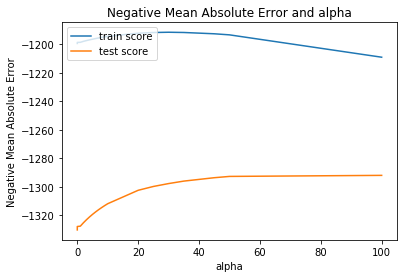

In [108]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [109]:
# Selecting final alpha = 25 (as test score started to decrease)
alpha = 50
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=50, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [110]:
#for ridge
y_trxgb=ridge.predict(X_train)
r2_score(y_train, y_trxgb)

0.5959372815609162

In [111]:
y_tstxgb=ridge.predict(X_test)
r2_score(y_test, y_tstxgb)

0.5388092375146456

In [112]:
mse_train=mse(y_train,y_trxgb)
mse_test = mse(y_test,y_tstxgb)
print(mse_train,mse_test )

3120041.141972722 3197415.8738502217


In [113]:
rmse_train=sqrt(mse_train )
rmse_test=sqrt(mse_test)
print(rmse_train,rmse_test)

1766.3638192548901 1788.131950905811


In [114]:
score_train = 100* (1-rmse_train/100000)
score_test = 100* (1-rmse_test/100000)

print(score_train,score_test)

98.23363618074511 98.21186804909419


In [115]:
tp2= ridge.predict(test_ac)

result = pd.DataFrame({'S.no':test_serial,'credit_amount':tp2})
result['credit_amount']=result['credit_amount'].round().astype(int)
result.head()

,S.no,credit_amount
0,1,775
1,2,6686
2,3,3347
3,4,3850
4,5,3601


In [116]:
result.to_csv (r'C:\Users\ghost\Desktop\hackathon\credit_amount10.csv', index = None, header=True)
pd.read_csv('credit_amount10.csv').head()

,S.no,credit_amount
0,1,775
1,2,6686
2,3,3347
3,4,3850
4,5,3601


In [117]:
len(result)

300

In [118]:
# Lasso regression

lasso = Lasso()

# cross validation
modelcv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

modelcv.fit(X_train, y_train) 

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    1.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 25,
                                   30, 35, 45, 50, 100, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [119]:
modelcv.best_params_

{'alpha': 100}

In [120]:
#cv scores 

cv_results = pd.DataFrame(modelcv.cv_results_)


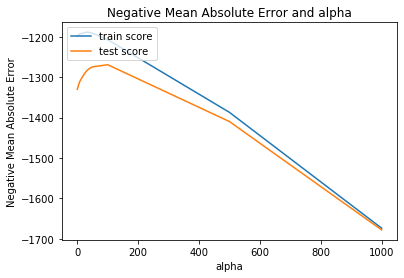

In [121]:
# plotting mean test and train scoes with alpha 

cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [122]:
alpha =66

lasso = Lasso(alpha=alpha,max_iter = 5000)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=66, copy_X=True, fit_intercept=True, max_iter=5000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [123]:
y_trxgb=lasso.predict(X_train)
r2_score(y_train, y_trxgb)

0.5846516362606591

In [124]:
y_tstxgb=lasso.predict(X_test)
r2_score(y_test, y_tstxgb)

0.552971403725302

In [125]:
mse_train=mse(y_train,y_trxgb)
mse_test = mse(y_test,y_tstxgb)
print(mse_train,mse_test )

3207185.231352059 3099230.179917343


In [126]:
rmse_train=sqrt(mse_train )
rmse_test=sqrt(mse_test)
print(rmse_train,rmse_test)

1790.861589110688 1760.463058379057


In [127]:
score_train = 100* (1-rmse_train/100000)
score_test = 100* (1-rmse_test/100000)

print(score_train,score_test)

98.20913841088931 98.23953694162094


In [128]:
tp2= lasso.predict(test_ac)

result = pd.DataFrame({'S.no':test_serial,'credit_amount':tp2})
result['credit_amount']=result['credit_amount'].round().astype(int)
result.head()

,S.no,credit_amount
0,1,845
1,2,6726
2,3,3512
3,4,3494
4,5,3523


In [129]:
result.to_csv (r'C:\Users\ghost\Desktop\hackathon\credit_amount18.csv', index = None, header=True)
pd.read_csv('credit_amount18.csv').head()

,S.no,credit_amount
0,1,845
1,2,6726
2,3,3512
3,4,3494
4,5,3523


{"rmse":2213.6281026104334}

In [130]:
len(result)

300

In [131]:
from sklearn.ensemble import RandomForestRegressor


In [132]:
#Hyperparameters tuning
hyper = {
    'max_depth': [4,5,8,10],
    'min_samples_leaf': range(10, 100, 10),
    'min_samples_split': range(10, 100,20),
    'n_estimators': [100,200,300,400], 
    'max_features': [5, 10,20,30]
}
rf= RandomForestRegressor()

folds= KFold(n_splits=5,shuffle=True,random_state=100)

rf_grid=GridSearchCV(estimator=rf,
                    param_grid=hyper,
                    cv=folds,
                    verbose=1,
                    n_jobs=-1,
                    return_train_score=True,
                    scoring='neg_mean_absolute_error'
                    )

In [133]:
rf_grid.fit(X_train, y_train)

In [134]:
rf_grid.best_params_

In [135]:
rf = RandomForestRegressor(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=5, 
                             min_samples_split=10,
                             max_features=25,
                             n_estimators=100,random_state=100)

In [136]:
# fit
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features=25, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=100, verbose=0, warm_start=False)

In [137]:
y_trxgb=rf.predict(X_train)
y_tstxgb=rf.predict(X_test)


In [138]:
mse_train=mse(y_train,y_trxgb)
mse_test = mse(y_test,y_tstxgb)
print(mse_train,mse_test )

1983598.698023711 3501120.972374996


In [139]:
rmse_train=sqrt(mse_train )
rmse_test=sqrt(mse_test)
print(rmse_train,rmse_test)

1408.4028890994618 1871.1282618716966


In [140]:
score_train = 100* (1-rmse_train/100000)
score_test = 100* (1-rmse_test/100000)

print(score_train,score_test)

98.59159711090054 98.1288717381283


In [141]:
tp2= rf.predict(test_ac)

result = pd.DataFrame({'S.no':test_serial,'credit_amount':tp2})
result['credit_amount']=result['credit_amount'].round().astype(int)
result.head()

,S.no,credit_amount
0,1,1240
1,2,5274
2,3,2599
3,4,4418
4,5,5669


In [142]:
result.to_csv (r'C:\Users\ghost\Desktop\hackathon\credit_amount14.csv', index = None, header=True)
pd.read_csv('credit_amount14.csv').head()

,S.no,credit_amount
0,1,1240
1,2,5274
2,3,2599
3,4,4418
4,5,5669
